<a href="https://colab.research.google.com/github/ksamcaN8/PGS_AdmixAncestry/blob/main/take_1mix5050_CUE%26YRI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import random
from numpy.ma.core import zeros
from scipy.stats.stats import pearsonr
from scipy.stats import ttest_ind
from scipy.stats import ttest_1samp
from scipy.stats import shapiro
from scipy.stats import normaltest
from statistics import mean
from operator import index

In [4]:
overall_length=2788731141 # length of genome

IBDfile=pd.read_csv('/content/pedsim_mix_YRIandCUE.seg',sep='\t',names=['sample_1','sample_2','chromosome','physical_position_start','physical_position_end','IBD_type','genetic_position_start','genetic_position_end','genetic_length'])
IBDfile['physical_length']=IBDfile['physical_position_end']-IBDfile['physical_position_start']
for i in range(0,len(IBDfile.index)):
  IBDfile.loc[i,'generation_sample1']=str(IBDfile.loc[i,'sample_1']).split('_')[1]
  IBDfile.loc[i,'generation_sample2']=str(IBDfile.loc[i,'sample_2']).split('_')[1].split('-')[0]
IBDfile=IBDfile[(IBDfile['generation_sample1']=='g1-b1-s1')&(IBDfile['generation_sample2']=='g3')]
# for every 2 samples: sum all the IBD lengths (times 2 if it's IBD2), and devide by genome length
IBD_scores=pd.DataFrame(IBDfile.query('IBD_type=="IBD1"').groupby(['sample_1','sample_2'])['physical_length'].sum()/(2*overall_length))
IBD_scores=pd.concat([IBD_scores,pd.DataFrame(IBDfile.query('IBD_type=="IBD2"').groupby(['sample_1','sample_2'])['physical_length'].sum()/(overall_length))])
IBD_scores['chosen_IBD']=np.zeros(len(IBD_scores.index))
for i in range(len(IBD_scores.index)//4):
  IBD_scores['chosen_IBD'][i*4+np.argmax(IBD_scores[i*4:i*4+4]['physical_length'])]=1
IBD_scores.reset_index(inplace=True)
IBD_scores.rename(columns = {'sample_2':'IID'},inplace=True)
IBD_scores.set_index('IID',inplace=True)

In [6]:
IBD_scores

,sample_1,physical_length,chosen_IBD
IID,,,
mixedSamples10_g3-b1-i1,mixedSamples10_g1-b1-s1,0.274853,0.0
mixedSamples10_g3-b1-i2,mixedSamples10_g1-b1-s1,0.390572,1.0
mixedSamples10_g3-b1-i3,mixedSamples10_g1-b1-s1,0.368179,0.0
mixedSamples10_g3-b1-i4,mixedSamples10_g1-b1-s1,0.253220,0.0
mixedSamples11_g3-b1-i1,mixedSamples11_g1-b1-s1,0.208403,0.0
...,...,...,...
mixedSamples8_g3-b1-i4,mixedSamples8_g1-b1-s1,0.208837,0.0
mixedSamples9_g3-b1-i1,mixedSamples9_g1-b1-s1,0.314979,1.0
mixedSamples9_g3-b1-i2,mixedSamples9_g1-b1-s1,0.205579,0.0


In [ ]:
samples_times880=pd.DataFrame()

for i in range(1,2):
  my_scores=pd.read_csv("/content/"+str(i)+"mix_YRIandCUE_noconections_Asthma_mixed_PGS002727.txt",sep='\t',names=['sampleset', 'IID', 'DENOM', 'Asthma-mixed_SUM','Asthma-mixed_AVG']).iloc[1: , :].drop(['sampleset','DENOM'],axis=1)
  my_scores=pd.merge(my_scores,
                    pd.read_csv("/content/"+str(i)+"mix_YRIandCUE_noconections_Asthma_European_PGS002754.txt",sep='\t',names=['sampleset', 'IID', 'DENOM', 'Asthma-European_SUM','Asthma-European_AVG']).iloc[1: , :].drop(['sampleset','DENOM'],axis=1)
                    ,on='IID',how='inner')
  my_scores=pd.merge(my_scores,
                    pd.read_csv("/content/"+str(i)+"mix_YRIandCUE_noconections_BMI_PGS002840.txt",sep='\t',names=['sampleset', 'IID', 'DENOM', 'BMI_SUM','BMI_AVG']).iloc[1: , :].drop(['sampleset','DENOM'],axis=1)
                    ,on='IID',how='inner')
  my_scores=pd.merge(my_scores,
                    pd.read_csv("/content/"+str(i)+"mix_YRIandCUE_noconections_CoronaryArteryDisease_PGS002778.txt",sep='\t',names=['sampleset', 'IID', 'DENOM', 'CAD_SUM','CAD_AVG']).iloc[1: , :].drop(['sampleset','DENOM'],axis=1)
                    ,on='IID',how='inner')
  my_scores=pd.merge(my_scores,
                    pd.read_csv("/content/"+str(i)+"mix_YRIandCUE_noconections_Diabetes_PGS003089.txt",sep='\t',names=['sampleset', 'IID', 'DENOM', 'Diabetes_SUM','Diabetes_AVG']).iloc[1: , :].drop(['sampleset','DENOM'],axis=1)
                    ,on='IID',how='inner')
  my_scores=pd.merge(my_scores,
                    pd.read_csv("/content/"+str(i)+"mix_YRIandCUE_noconections_Heartdisease_PGS001780.txt",sep='\t',names=['sampleset', 'IID', 'DENOM', 'Heartdisease_SUM','Heartdisease_AVG']).iloc[1: , :].drop(['sampleset','DENOM'],axis=1)
                    ,on='IID',how='inner')
  my_scores=pd.merge(my_scores,
                    pd.read_csv("/content/"+str(i)+"mix_YRIandCUE_noconections_Hypertension_PGS002994.txt",sep='\t',names=['sampleset', 'IID', 'DENOM', 'Hypertension_SUM','Hypertension_AVG']).iloc[1: , :].drop(['sampleset','DENOM'],axis=1)
                    ,on='IID',how='inner')
  my_scores=pd.merge(my_scores,
                    pd.read_csv("/content/"+str(i)+"mix_YRIandCUE_noconections_Obesity_PGS002033.txt",sep='\t',names=['sampleset', 'IID', 'DENOM', 'Obesity_SUM','Obesity_AVG']).iloc[1: , :].drop(['sampleset','DENOM'],axis=1)
                    ,on='IID',how='inner')
  my_scores=pd.merge(my_scores,
                    pd.read_csv("/content/"+str(i)+"mix_YRIandCUE_noconections_mix_BMI_PGS002313.txt",sep='\t',names=['sampleset', 'IID', 'DENOM', 'mix-BMI_SUM','mix-BMI_AVG']).iloc[1: , :].drop(['sampleset','DENOM'],axis=1)
                    ,on='IID',how='inner')
  my_scores=pd.merge(my_scores,
                    pd.read_csv("/content/"+str(i)+"mix_YRIandCUE_noconections_mix_Diabetes_PGS002720.txt",sep='\t',names=['sampleset', 'IID', 'DENOM', 'mix-Diabetes_SUM','mix-Diabetes_AVG']).iloc[1: , :].drop(['sampleset','DENOM'],axis=1)
                    ,on='IID',how='inner')
  my_scores=pd.merge(my_scores,
                    pd.read_csv("/content/"+str(i)+"mix_YRIandCUE_noconections_mix_Hypertension_PGS002701.txt",sep='\t',names=['sampleset', 'IID', 'DENOM', 'mix-Hypertension_SUM','mix-Hypertension_AVG']).iloc[1: , :].drop(['sampleset','DENOM'],axis=1)
                    ,on='IID',how='inner')
  my_scores=pd.merge(my_scores,
                    pd.read_csv("/content/"+str(i)+"mix_YRIandCUE_noconections_schizophrenia.txt",sep='\t',names=['sampleset', 'IID', 'DENOM', 'Schizophrenia_SUM','Schizophrenia_AVG']).iloc[1: , :].drop(['sampleset','DENOM'],axis=1)
                    ,on='IID',how='inner')
  if i==1:
    admix=pd.read_csv("/content/"+str(i)+"trimmed_YRIandCUEand_pedsim_mix_YRIandCUE.2.Q",sep='\s',names=['CUE','YRI']) # ,names=['YRI','CUE']) # ?? - what is the right order??
  else:
    admix=pd.read_csv("/content/"+str(i)+"trimmed_YRIandCUEand_pedsim_mix_YRIandCUE.2.Q",sep='\s',names=['YRI','CUE']) # ?? - what is the right order??
  admix=pd.concat([pd.read_csv("/content/"+str(i)+"samples_YRIandCUEand_pedsim_mix_YRIandCUE.txt",names=['IID']),admix], axis="columns")
  admix.set_index('IID',inplace=True)
  my_scores=pd.merge(my_scores,admix,on='IID',how='inner')
  for c in my_scores.columns:
    if c !='IID':
      my_scores=my_scores.astype({c:float})
  my_scores=pd.merge(my_scores,IBD_scores,on='IID',how='outer')


  my_scores['chosen_Asthma_mixed']=np.zeros(len(my_scores.index))
  my_scores['chosen_Asthma_European']=np.zeros(len(my_scores.index))
  my_scores['chosen_BMI']=np.zeros(len(my_scores.index))
  my_scores['chosen_CAD']=np.zeros(len(my_scores.index))
  my_scores['chosen_Diabetes']=np.zeros(len(my_scores.index))
  my_scores['chosen_Heartdisease']=np.zeros(len(my_scores.index))
  my_scores['chosen_Hypertension']=np.zeros(len(my_scores.index))
  my_scores['chosen_mix_BMI']=np.zeros(len(my_scores.index))
  my_scores['chosen_mix_Diabetes']=np.zeros(len(my_scores.index))
  my_scores['chosen_mix_Hypertension']=np.zeros(len(my_scores.index))
  my_scores['chosen_Obesity']=np.zeros(len(my_scores.index))
  my_scores['chosen_Scizophrenia']=np.zeros(len(my_scores.index))
  my_scores['chosen_CUE']=np.zeros(len(my_scores.index))
  my_scores['Generation']=np.zeros(len(my_scores.index))
  my_scores['Family']=np.zeros(len(my_scores.index))
  for j in range(0,len(my_scores.index)//10):
    my_scores['chosen_Asthma_European'][j*10+6+np.argmin(my_scores[j*10+6:j*10+10]['Asthma-European_SUM'])]=1
    my_scores['chosen_Asthma_mixed'][j*10+6+np.argmin(my_scores[j*10+6:j*10+10]['Asthma-mixed_SUM'])]=1
    my_scores['chosen_BMI'][j*10+6+np.argmin(my_scores[j*10+6:j*10+10]['BMI_SUM'])]=1
    my_scores['chosen_CAD'][j*10+6+np.argmin(my_scores[j*10+6:j*10+10]['CAD_SUM'])]=1
    my_scores['chosen_Diabetes'][j*10+6+np.argmin(my_scores[j*10+6:j*10+10]['Diabetes_SUM'])]=1
    my_scores['chosen_Heartdisease'][j*10+6+np.argmin(my_scores[j*10+6:j*10+10]['Heartdisease_SUM'])]=1
    my_scores['chosen_Hypertension'][j*10+6+np.argmin(my_scores[j*10+6:j*10+10]['Hypertension_SUM'])]=1
    my_scores['chosen_mix_BMI'][j*10+6+np.argmin(my_scores[j*10+6:j*10+10]['mix-BMI_SUM'])]=1
    my_scores['chosen_mix_Diabetes'][j*10+6+np.argmin(my_scores[j*10+6:j*10+10]['mix-Diabetes_SUM'])]=1
    my_scores['chosen_mix_Hypertension'][j*10+6+np.argmin(my_scores[j*10+6:j*10+10]['mix-Hypertension_SUM'])]=1
    my_scores['chosen_Obesity'][j*10+6+np.argmin(my_scores[j*10+6:j*10+10]['Obesity_SUM'])]=1
    my_scores['chosen_Scizophrenia'][j*10+6+np.argmin(my_scores[j*10+6:j*10+10]['Schizophrenia_SUM'])]=1
    my_scores['chosen_CUE'][j*10+6+np.argmax(my_scores[j*10+6:j*10+10]['CUE'])]=1
    my_scores['Generation'][j*10:j*10+4]=1
    my_scores['Generation'][j*10+4:j*10+6]=2
    my_scores['Generation'][j*10+6:j*10+10]=3
    my_scores['Family'][j*10:j*10+10]=j+88*(i-1)

  samples_times880=pd.concat([samples_times880,my_scores],ignore_index=True)

samples_times880['CUE']=round(samples_times880['CUE']*100,4)
parent_CUE_means=samples_times880.groupby(['Family','Generation']).mean().query('Generation==2')['CUE']

In [ ]:
my_scores.loc[:20,'physical_length']

In [11]:
my_scores=samples_times880

In [17]:
print("Correlation Tests, Mix5050_CUE&YRI:")
#print('Asthma-mixed first generation',pearsonr(my_scores.query('Generation==1')['CUE'],my_scores.query('Generation==1')['Asthma-mixed_SUM']))
#print('Asthma-mixed second generation',pearsonr(my_scores.query('Generation==2')['CUE'],my_scores.query('Generation==2')['Asthma-mixed_SUM']))
print('Asthma-mixed third generation',pearsonr(my_scores.query('Generation==3')['CUE'],my_scores.query('Generation==3')['Asthma-mixed_SUM']))
print()
#print('Scizophrenia first generation',pearsonr(my_scores.query('Generation==1')['CUE'],my_scores.query('Generation==1')['Schizophrenia_SUM']))
#print('Scizophrenia second generation',pearsonr(my_scores.query('Generation==2')['CUE'],my_scores.query('Generation==2')['Schizophrenia_SUM']))
print('Scizophrenia third generation',pearsonr(my_scores.query('Generation==3')['CUE'],my_scores.query('Generation==3')['Schizophrenia_SUM']))
print()
#print('Obesity first generation',pearsonr(my_scores.query('Generation==1')['CUE'],my_scores.query('Generation==1')['Obesity_SUM']))
#print('Obesity second generation',pearsonr(my_scores.query('Generation==2')['CUE'],my_scores.query('Generation==2')['Obesity_SUM']))
print('Obesity third generation',pearsonr(my_scores.query('Generation==3')['CUE'],my_scores.query('Generation==3')['Obesity_SUM']))
print()
#print('Diabetes first generation',pearsonr(my_scores.query('Generation==1')['CUE'],my_scores.query('Generation==1')['Diabetes_SUM']))
#print('Diabetes second generation',pearsonr(my_scores.query('Generation==2')['CUE'],my_scores.query('Generation==2')['Diabetes_SUM']))
print('Diabetes third generation',pearsonr(my_scores.query('Generation==3')['CUE'],my_scores.query('Generation==3')['Diabetes_SUM']))
print()
#print('mix-Diabetes first generation',pearsonr(my_scores.query('Generation==1')['CUE'],my_scores.query('Generation==1')['mix-Diabetes_SUM']))
#print('mix-Diabetes second generation',pearsonr(my_scores.query('Generation==2')['CUE'],my_scores.query('Generation==2')['mix-Diabetes_SUM']))
print('mix-Diabetes third generation',pearsonr(my_scores.query('Generation==3')['CUE'],my_scores.query('Generation==3')['mix-Diabetes_SUM']))
print()
#print('mix-Hypertension first generation',pearsonr(my_scores.query('Generation==1')['CUE'],my_scores.query('Generation==1')['mix-Hypertension_SUM']))
#print('mix-Hypertension second generation',pearsonr(my_scores.query('Generation==2')['CUE'],my_scores.query('Generation==2')['mix-Hypertension_SUM']))
print('mix-Hypertension third generation',pearsonr(my_scores.query('Generation==3')['CUE'],my_scores.query('Generation==3')['mix-Hypertension_SUM']))
print()
#print('mix-BMI first generation',pearsonr(my_scores.query('Generation==1')['CUE'],my_scores.query('Generation==1')['mix-BMI_SUM']))
#print('mix-BMI second generation',pearsonr(my_scores.query('Generation==2')['CUE'],my_scores.query('Generation==2')['mix-BMI_SUM']))
print('mix-BMI third generation',pearsonr(my_scores.query('Generation==3')['CUE'],my_scores.query('Generation==3')['mix-BMI_SUM']))
print()
#print('BMI first generation',pearsonr(my_scores.query('Generation==1')['CUE'],my_scores.query('Generation==1')['BMI_SUM']))
#print('BMI second generation',pearsonr(my_scores.query('Generation==2')['CUE'],my_scores.query('Generation==2')['BMI_SUM']))
print('BMI third generation',pearsonr(my_scores.query('Generation==3')['CUE'],my_scores.query('Generation==3')['BMI_SUM']))
print()
#print('Hypertension first generation',pearsonr(my_scores.query('Generation==1')['CUE'],my_scores.query('Generation==1')['Hypertension_SUM']))
#print('Hypertension second generation',pearsonr(my_scores.query('Generation==2')['CUE'],my_scores.query('Generation==2')['Hypertension_SUM']))
print('Hypertension third generation',pearsonr(my_scores.query('Generation==3')['CUE'],my_scores.query('Generation==3')['Hypertension_SUM']))
print()
#print('Asthma-European first generation',pearsonr(my_scores.query('Generation==1')['CUE'],my_scores.query('Generation==1')['Asthma-European_SUM']))
#print('Asthma-European second generation',pearsonr(my_scores.query('Generation==2')['CUE'],my_scores.query('Generation==2')['Asthma-European_SUM']))
print('Asthma-European third generation',pearsonr(my_scores.query('Generation==3')['CUE'],my_scores.query('Generation==3')['Asthma-European_SUM']))
print()
#print('Heartdisease first generation',pearsonr(my_scores.query('Generation==1')['CUE'],my_scores.query('Generation==1')['Heartdisease_SUM']))
#print('Heartdisease second generation',pearsonr(my_scores.query('Generation==2')['CUE'],my_scores.query('Generation==2')['Heartdisease_SUM']))
print('Heartdisease third generation',pearsonr(my_scores.query('Generation==3')['CUE'],my_scores.query('Generation==3')['Heartdisease_SUM']))
print()
#print('CAD first generation',pearsonr(my_scores.query('Generation==1')['CUE'],my_scores.query('Generation==1')['CAD_SUM']))
#print('CAD second generation',pearsonr(my_scores.query('Generation==2')['CUE'],my_scores.query('Generation==2')['CAD_SUM']))
print('CAD third generation',pearsonr(my_scores.query('Generation==3')['CUE'],my_scores.query('Generation==3')['CAD_SUM']))
print()
print('IBD third generation',pearsonr(my_scores.query('Generation==3')['CUE'],my_scores.query('Generation==3')['physical_length']))

Correlation Tests, Mix5050_CUE&YRI:
Asthma-mixed third generation PearsonRResult(statistic=-0.7417090231206401, pvalue=1.1173918452131969e-62)

Scizophrenia third generation PearsonRResult(statistic=-0.6984038654403985, pvalue=8.72735405206055e-53)

Obesity third generation PearsonRResult(statistic=-0.4904569555726576, pvalue=1.0537511654748923e-22)

Diabetes third generation PearsonRResult(statistic=-0.3490751768323198, pvalue=1.5937502160818388e-11)

mix-Diabetes third generation PearsonRResult(statistic=-0.27870060501609456, pvalue=1.0608323705525515e-07)

mix-Hypertension third generation PearsonRResult(statistic=-0.21425220685066293, pvalue=5.065439932863264e-05)

mix-BMI third generation PearsonRResult(statistic=-0.18706761118180826, pvalue=0.00041805972520412524)

BMI third generation PearsonRResult(statistic=-0.18097762700801906, pvalue=0.0006458826886860986)

Hypertension third generation PearsonRResult(statistic=-0.1594120629909535, pvalue=0.002705116816959138)

Asthma-Europe

In [14]:
print('Asthma multi-ancestry', ttest_1samp(my_scores.query('chosen_Asthma_mixed==1')['CUE']-np.array(parent_CUE_means),0)[1])
print('Scizophrenia', ttest_1samp(my_scores.query('chosen_Scizophrenia==1')['CUE']-np.array(parent_CUE_means),0)[1])
print('Obesity', ttest_1samp(my_scores.query('chosen_Obesity==1')['CUE']-np.array(parent_CUE_means),0)[1])
print('Diabetes', ttest_1samp(my_scores.query('chosen_mix_Diabetes==1')['CUE']-np.array(parent_CUE_means),0)[1])
print('Diabetes multi-ancestry', ttest_1samp(my_scores.query('chosen_Diabetes==1')['CUE']-np.array(parent_CUE_means),0)[1])
print('Hypertension multi-ancestry', round(ttest_1samp(my_scores.query('chosen_mix_Hypertension==1')['CUE']-np.array(parent_CUE_means),0)[1],3))
print('BMI multi-ancestry', round(ttest_1samp(my_scores.query('chosen_mix_BMI==1')['CUE']-np.array(parent_CUE_means),0)[1],7))
print('BMI', round(ttest_1samp(my_scores.query('chosen_BMI==1')['CUE']-np.array(parent_CUE_means),0)[1],3))
print('Hypertension', round(ttest_1samp(my_scores.query('chosen_Hypertension==1')['CUE']-np.array(parent_CUE_means),0)[1],3))
print('Asthma', round(ttest_1samp(my_scores.query('chosen_Asthma_European==1')['CUE']-np.array(parent_CUE_means),0)[1],3))
print('Heartdisease ', round(ttest_1samp(my_scores.query('chosen_Heartdisease ==1')['CUE']-np.array(parent_CUE_means),0)[1],3))
print('CAD ', round(ttest_1samp(my_scores.query('chosen_CAD ==1')['CUE']-np.array(parent_CUE_means),0)[1],3))
print('CUE', ttest_1samp(my_scores.query('chosen_CUE==1')['CUE']-np.array(parent_CUE_means),0)[1])
print('IBD', ttest_1samp(my_scores.query('chosen_IBD==1')['CUE']-np.array(parent_CUE_means),0)[1])

Asthma multi-ancestry 0.0004504417703470315
Scizophrenia 0.007166850626658856
Obesity 0.09729882431938401
Diabetes 0.5460713741258197
Diabetes multi-ancestry 0.17581325424301628
Hypertension multi-ancestry 0.574
BMI multi-ancestry 0.3790242
BMI 0.591
Hypertension 0.625
Asthma 0.096
Heartdisease  0.617
CAD  0.517
CUE 7.088639543365729e-16
IBD 0.9118633318131655


Text(-11, 10, 'P= 0.91')

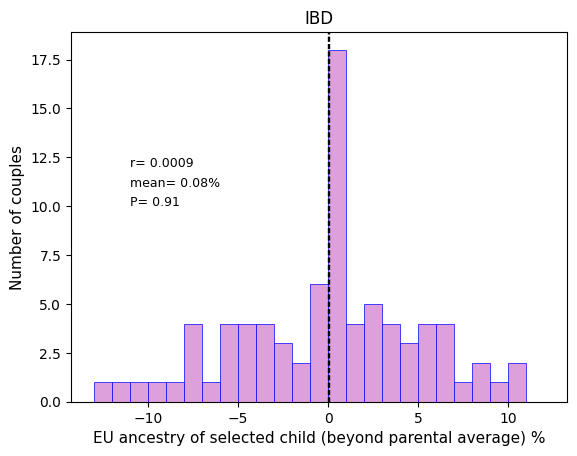

In [28]:
plt.title('IBD')
#plt.suptitle('The percentage difference between the average of the parents and the European percentage of the chosen child \n Population created in simulation, assimilated 2 generations ago ',fontsize=14)
plt.xlabel('EU ancestry of selected child (beyond parental average) %',fontsize=11)
plt.ylabel('Number of couples',fontsize=11)
plt.hist(my_scores.query('chosen_IBD==1')['CUE']-np.array(parent_CUE_means),color = "plum", ec="blue",lw=0.5,bins=np.arange(-13,13,1),label='IBD')
plt.axvline(0, color='black',linestyle='dashed', linewidth=1)
plt.axvline(np.mean(my_scores.query('chosen_IBD==1')['CUE']-np.array(parent_CUE_means)), color='black',linestyle='dashed', linewidth=1)
plt.text(-11,12,'r= '+str(round(pearsonr(my_scores.query('Generation==3')['CUE'],my_scores.query('Generation==3')['physical_length'])[0],4)),fontsize=9)
plt.text(-11,11,'mean= '+str(round(np.mean(my_scores.query('chosen_IBD==1')['CUE']-np.array(parent_CUE_means)),2))+ '%', fontsize = 9)
plt.text(-11,10,'P= '+str(round(ttest_1samp(my_scores.query('chosen_IBD==1')['CUE']-np.array(parent_CUE_means),0)[1],2)),fontsize = 9)

Text(-10, 15, 'P= 2.8e-31')

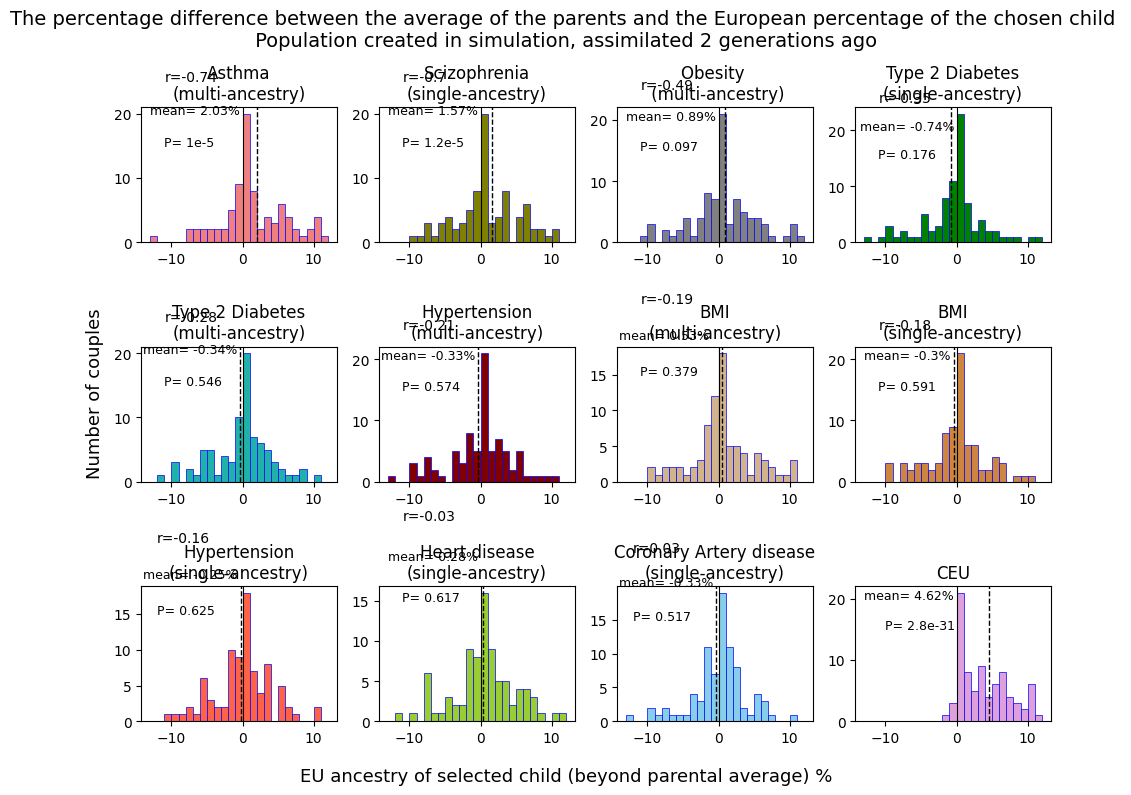

In [21]:
fig, axes = plt.subplots(3, 4, sharey=False, figsize=(10,8), tight_layout=True)
#fig.suptitle("mix5050_CUE&YRI \n The European percentage of the child with the best score - the average of the European percentage of both parents",fontsize=16)
fig.suptitle('The percentage difference between the average of the parents and the European percentage of the chosen child \n Population created in simulation, assimilated 2 generations ago ',fontsize=14)
fig.supxlabel('EU ancestry of selected child (beyond parental average) %',fontsize=13)
fig.supylabel('Number of couples',fontsize=13)
axes[0,0].set_title('Asthma\n(multi-ancestry)')
axes[0,0].hist(my_scores.query('chosen_Asthma_mixed==1')['CUE']-np.array(parent_CUE_means),color = "lightcoral", ec="blue",lw=0.5,bins=np.arange(-13,13,1),label='Asthma_mixed')
axes[0,0].axvline(np.mean(my_scores.query('chosen_Asthma_mixed==1')['CUE']-np.array(parent_CUE_means)), color='black', linestyle='dashed', linewidth=1)
axes[0,0].text(-11,25,'r='+ str(round(pearsonr(my_scores.query('Generation==3')['CUE'],my_scores.query('Generation==3')['Asthma-mixed_SUM'])[0],2)), fontsize = 10)
axes[0,0].text(-13,20,'mean= '+str(round(np.mean(my_scores.query('chosen_Asthma_mixed==1')['CUE']-np.array(parent_CUE_means)),2))+ '%', fontsize = 9)
axes[0,0].text(-11,15,'P= '+'1e-5', fontsize = 9)
axes[0,0].axvline(0,color='black',linewidth=0.8)
axes[0,1].set_title('Scizophrenia\n(single-ancestry)')
axes[0,1].hist(my_scores.query('chosen_Scizophrenia==1')['CUE']-np.array(parent_CUE_means),color = "olive", ec="blue",lw=0.5,bins=np.arange(-13,13,1),label='Scizophrenia')
axes[0,1].axvline(np.mean(my_scores.query('chosen_Scizophrenia==1')['CUE']-np.array(parent_CUE_means)), color='black',linestyle='dashed', linewidth=1)
axes[0,1].text(-11,25,'r='+ str(round(pearsonr(my_scores.query('Generation==3')['CUE'],my_scores.query('Generation==3')['Schizophrenia_SUM'])[0],2)), fontsize = 10)
axes[0,1].text(-13,20,'mean= '+ str(round(np.mean(my_scores.query('chosen_Scizophrenia==1')['CUE']-np.array(parent_CUE_means)),2))+ '%', fontsize = 9)
axes[0,1].text(-11,15,'P= '+'1.2e-5', fontsize = 9)
axes[0,1].axvline(0,color='black',linewidth=0.8)
axes[0,2].set_title('Obesity \n (multi-ancestry)')
axes[0,2].hist(my_scores.query('chosen_Obesity==1')['CUE']-np.array(parent_CUE_means),color = "gray", ec="blue",lw=0.5,bins=np.arange(-13,13,1),label='Obesity')
axes[0,2].axvline(np.mean(my_scores.query('chosen_Obesity==1')['CUE']-np.array(parent_CUE_means)), color='black', linestyle='dashed', linewidth=1)
axes[0,2].text(-11,25,'r='+ str(round(pearsonr(my_scores.query('Generation==3')['CUE'],my_scores.query('Generation==3')['Obesity_SUM'])[0],2)), fontsize = 10)
axes[0,2].text(-13,20,'mean= '+str(round(np.mean(my_scores.query('chosen_Obesity==1')['CUE']-np.array(parent_CUE_means)),2))+ '%', fontsize = 9)
axes[0,2].text(-11,15,'P= '+str(round(ttest_1samp(my_scores.query('chosen_Obesity==1')['CUE']-np.array(parent_CUE_means),0)[1],3)), fontsize = 9)
axes[0,2].axvline(0,color='black',linewidth=0.8)
axes[0,3].set_title('Type 2 Diabetes\n(single-ancestry)')
axes[0,3].hist(my_scores.query('chosen_Diabetes==1')['CUE']-np.array(parent_CUE_means),color = "green", ec="blue",lw=0.5,bins=np.arange(-13,13,1),label='Diabetes')
axes[0,3].axvline(np.mean(my_scores.query('chosen_Diabetes==1')['CUE']-np.array(parent_CUE_means)), color='black', linestyle='dashed', linewidth=1)
axes[0,3].text(-11,25,'r='+ str(round(pearsonr(my_scores.query('Generation==3')['CUE'],my_scores.query('Generation==3')['Diabetes_SUM'])[0],2)), fontsize = 10)
axes[0,3].text(-13.5,20,'mean= '+str(round(np.mean(my_scores.query('chosen_Diabetes==1')['CUE']-np.array(parent_CUE_means)),2))+ '%', fontsize = 9)
axes[0,3].text(-11,15,'P= '+str( round(ttest_1samp(my_scores.query('chosen_Diabetes==1')['CUE']-np.array(parent_CUE_means),0)[1],3)),fontsize = 9)
axes[0,3].axvline(0,color='black',linewidth=0.8)
axes[1,0].set_title('Type 2 Diabetes\n(multi-ancestry)')
axes[1,0].hist(my_scores.query('chosen_mix_Diabetes==1')['CUE']-np.array(parent_CUE_means),color = "lightseagreen", ec="blue",lw=0.5,bins=np.arange(-13,13,1),label='mix-Diabetes')
axes[1,0].axvline(np.mean(my_scores.query('chosen_mix_Diabetes==1')['CUE']-np.array(parent_CUE_means)), color='black', linestyle='dashed', linewidth=1)
axes[1,0].text(-11,25,'r='+ str(round(pearsonr(my_scores.query('Generation==3')['CUE'],my_scores.query('Generation==3')['mix-Diabetes_SUM'])[0],2)), fontsize = 10)
axes[1,0].text(-14,20,'mean= '+str(round(np.mean(my_scores.query('chosen_mix_Diabetes==1')['CUE']-np.array(parent_CUE_means)),2))+ '%', fontsize = 9)
axes[1,0].text(-11,15,'P= '+str( round(ttest_1samp(my_scores.query('chosen_mix_Diabetes==1')['CUE']-np.array(parent_CUE_means),0)[1],3)),fontsize = 9)
axes[1,0].axvline(0,color='black',linewidth=0.8)
axes[1,1].set_title('Hypertension\n(multi-ancestry)')
axes[1,1].hist(my_scores.query('chosen_mix_Hypertension==1')['CUE']-np.array(parent_CUE_means),color = "maroon", ec="blue",lw=0.5,bins=np.arange(-13,13,1),label='Hypertension')
axes[1,1].axvline(np.mean(my_scores.query('chosen_mix_Hypertension==1')['CUE']-np.array(parent_CUE_means)), color='black', linestyle='dashed', linewidth=1)
axes[1,1].text(-11,25,'r='+ str(round(pearsonr(my_scores.query('Generation==3')['CUE'],my_scores.query('Generation==3')['mix-Hypertension_SUM'])[0],2)), fontsize = 10)
axes[1,1].text(-14,20,'mean= '+str(round(np.mean(my_scores.query('chosen_mix_Hypertension==1')['CUE']-np.array(parent_CUE_means)),2))+ '%', fontsize = 9)
axes[1,1].text(-11,15,'P= '+str( round(ttest_1samp(my_scores.query('chosen_mix_Hypertension==1')['CUE']-np.array(parent_CUE_means),0)[1],3)),fontsize = 9)
axes[1,2].axvline(0,color='black',linewidth=0.8)
axes[1,2].set_title('BMI\n(multi-ancestry)')
axes[1,2].hist(my_scores.query('chosen_mix_BMI==1')['CUE']-np.array(parent_CUE_means),color = "tan", ec="blue",lw=0.5,bins=np.arange(-13,13,1),label='mix-BMI')
axes[1,2].axvline(np.mean(my_scores.query('chosen_mix_BMI==1')['CUE']-np.array(parent_CUE_means)),color='black', linestyle='dashed', linewidth=1)
axes[1,2].text(-11,25,'r='+ str(round(pearsonr(my_scores.query('Generation==3')['CUE'],my_scores.query('Generation==3')['mix-BMI_SUM'])[0],2)), fontsize = 10)
axes[1,2].text(-14,20,'mean= '+str(round(np.mean(my_scores.query('chosen_mix_BMI==1')['CUE']-np.array(parent_CUE_means)),2))+ '%', fontsize = 9)
axes[1,2].text(-11,15,'P= '+str( round(ttest_1samp(my_scores.query('chosen_mix_BMI==1')['CUE']-np.array(parent_CUE_means),0)[1],3)),fontsize = 9)
axes[1,2].axvline(0,color='black',linewidth=0.8)
axes[1,3].set_title('BMI\n(single-ancestry)')
axes[1,3].hist(my_scores.query('chosen_BMI==1')['CUE']-np.array(parent_CUE_means),color = "peru", ec="blue",lw=0.5,bins=np.arange(-13,13,1),label='BMI')
axes[1,3].axvline(np.mean(my_scores.query('chosen_BMI==1')['CUE']-np.array(parent_CUE_means)),color='black', linestyle='dashed', linewidth=1)
axes[1,3].text(-11,25,'r='+ str(round(pearsonr(my_scores.query('Generation==3')['CUE'],my_scores.query('Generation==3')['BMI_SUM'])[0],2)), fontsize = 10)
axes[1,3].text(-13,20,'mean= '+str(round(np.mean(my_scores.query('chosen_BMI==1')['CUE']-np.array(parent_CUE_means)),2))+ '%', fontsize = 9)
axes[1,3].text(-11,15,'P= '+str(round(ttest_1samp(my_scores.query('chosen_BMI==1')['CUE']-np.array(parent_CUE_means),0)[1],3)),fontsize = 9)
axes[1,3].axvline(0,color='black',linewidth=0.8)
axes[2,0].set_title('Hypertension\n(single-ancestry)')
axes[2,0].hist(my_scores.query('chosen_Hypertension==1')['CUE']-np.array(parent_CUE_means),color = "tomato", ec="blue",lw=0.5,bins=np.arange(-13,13,1),label='Hypertension')
axes[2,0].axvline(np.mean(my_scores.query('chosen_Hypertension==1')['CUE']-np.array(parent_CUE_means)), color='black', linestyle='dashed', linewidth=1)
axes[2,0].text(-12,25,'r='+ str(round(pearsonr(my_scores.query('Generation==3')['CUE'],my_scores.query('Generation==3')['Hypertension_SUM'])[0],2)), fontsize = 10)
axes[2,0].text(-14,20,'mean= '+str(round(np.mean(my_scores.query('chosen_Hypertension==1')['CUE']-np.array(parent_CUE_means)),2))+ '%', fontsize = 9)
axes[2,0].text(-12,15,'P= '+str(round(ttest_1samp(my_scores.query('chosen_Hypertension==1')['CUE']-np.array(parent_CUE_means),0)[1],3)),fontsize = 9)
axes[2,0].axvline(0,color='black',linewidth=0.8)
#axes[0,0].set_title('Asthma_European')
#axes[0,0].hist(samples_2220.query('chosen_Asthma_European==1')['CUE']-np.array(parent_CUE_means),color = "indigo", ec="blue",lw=0.5,bins=20,label='Asthma_European')
#axes[0,0].axvline(np.mean(samples_2220.query('chosen_Asthma_European==1')['CUE']-np.array(parent_CUE_means)),  color='black', linestyle='dashed', linewidth=1)
axes[2,1].set_title('Heart disease\n(single-ancestry)')
axes[2,1].hist(my_scores.query('chosen_Heartdisease==1')['CUE']-np.array(parent_CUE_means),color = "yellowgreen", ec="blue",lw=0.5,bins=np.arange(-13,13,1),label='Heartdisease')
axes[2,1].axvline(np.mean(my_scores.query('chosen_Heartdisease==1')['CUE']-np.array(parent_CUE_means)), color='black', linestyle='dashed', linewidth=1)
axes[2,1].text(-11,25,'r='+ str(round(pearsonr(my_scores.query('Generation==3')['CUE'],my_scores.query('Generation==3')['Heartdisease_SUM'])[0],2)), fontsize = 10)
axes[2,1].text(-13,20,'mean= '+str(round(np.mean(my_scores.query('chosen_Heartdisease==1')['CUE']-np.array(parent_CUE_means)),2))+ '%', fontsize = 9)
axes[2,1].text(-11,15,'P= '+str(round(ttest_1samp(my_scores.query('chosen_Heartdisease==1')['CUE']-np.array(parent_CUE_means),0)[1],3)),fontsize = 9)
axes[2,1].axvline(0,color='black',linewidth=0.8)
axes[2,2].set_title('Coronary Artery disease\n(single-ancestry)')
axes[2,2].hist(my_scores.query('chosen_CAD==1')['CUE']-np.array(parent_CUE_means),color = "skyblue", ec="blue",lw=0.5,bins=np.arange(-13,13,1),label='CAD')
axes[2,2].axvline(np.mean(my_scores.query('chosen_CAD==1')['CUE']-np.array(parent_CUE_means)), color='black', linestyle='dashed', linewidth=1)
axes[2,2].text(-12,25,'r='+ str(round(pearsonr(my_scores.query('Generation==3')['CUE'],my_scores.query('Generation==3')['CAD_SUM'])[0],2)), fontsize = 10)
axes[2,2].text(-14,20,'mean= '+str(round(np.mean(my_scores.query('chosen_CAD==1')['CUE']-np.array(parent_CUE_means)),2))+ '%', fontsize = 9)
axes[2,2].text(-12,15,'P= '+str(round(ttest_1samp(my_scores.query('chosen_CAD==1')['CUE']-np.array(parent_CUE_means),0)[1],3)),fontsize = 9)
axes[2,2].axvline(0,color='black',linewidth=0.8)
axes[2,3].set_title('CEU')
axes[2,3].hist(my_scores.query('chosen_CUE==1')['CUE']-np.array(parent_CUE_means),color = "plum", ec="blue",lw=0.5,bins=np.arange(-13,13,1),label='CUE')
axes[2,3].axvline(0,color='black',linewidth=0.8)
axes[2,3].axvline(np.mean(my_scores.query('chosen_CUE==1')['CUE']-np.array(parent_CUE_means)), color='black',linestyle='dashed', linewidth=1)
#axes[2,3].text(-10,25,'r='+ str(round(pearsonr(my_scores.query('Generation==3')['CUE'],my_scores.query('Generation==3')['CUE'])[0],2)), fontsize = 8)
axes[2,3].text(-13,20,'mean= '+str(round(np.mean(my_scores.query('chosen_CUE==1')['CUE']-np.array(parent_CUE_means)),2))+ '%', fontsize = 9)
axes[2,3].text(-10,15,'P= '+'2.8e-31',fontsize = 9)